# Python Refresher  for CS 237 and CS 132

This document summarizes what you need to know about Python for CS 237 and CS 132. 
Even if you already know the language well, you should look this through,
as I explain how to avoid nasty bugs in your coding this semester. 


NOTE: To see a video walk-through with my comments, check out my YouTube video <a href="https://youtu.be/ikfXoX4X_eE">here</a>. 

In [152]:
# Here are some imports which will be used in the code in the rest of the lab  

# Imports used for the code in CS 237

import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
import seaborn as sns             # Fancy plotting 
import pandas as pd               # Data input and manipulation

from collections import Counter

import math


## Basic Python Programming

In [153]:
print("here is a definition")

def sayHi(name):
    return "Hi there, " + name

sayHi('Paul')

here is a definition


'Hi there, Paul'

### Optional Arguments

Python allows a lot of flexibility when you define functions; in particular,
it allows you to define functions with a variable number of arguments,
and optional arguments with default values. This simplifies the syntax
when you have a function which you want to use in a variety of contexts;
many of the statistical functions operation in this way, for example. 

In [154]:
# Variable number of arguments, this looks a lot like how it is done in C

# The following function collects together all its arguments into a tuple,
# which can then be accessed as usual inside the function

def my_sum(*args):
    print('All the arguments:', args)
    print('Number of arguments:', len(args))
    if len(args) > 0:
        print('Last argument:', args[-1])
    return sum(args)
        
print('Sum = ', my_sum(2,2,5,4,7,-3))
print()
print('Sum = ', my_sum(4))
print()
print('Sum = ', my_sum())

All the arguments: (2, 2, 5, 4, 7, -3)
Number of arguments: 6
Last argument: -3
Sum =  17

All the arguments: (4,)
Number of arguments: 1
Last argument: 4
Sum =  4

All the arguments: ()
Number of arguments: 0
Sum =  0


In [155]:
# Optional Arguments with Default Values

# You may give arguments with default values using
# an initialization in the definition, as shown here:

#           x is a normal parameter, you MUST supply it 
#                          m is optional, if you leave it out it will get the default
#                                         b ditto
def LC_Hash(x, a = 2137, m = 6827, b = 0):
    print('x =',x, ', a =',a, ', m =',m, ', b =',b)
    return ((a * x) % m) + b

# Here we give all four values

print( LC_Hash( 5, 3, 7, 1) )         # x <- 5, a <- 3, m <- 7, b <- 1
print()

# Here we give only first, rest will take optional values

print( LC_Hash( 5 ) )         # x <- 5, a <- 3, m <- 7, b <- 1
print()

# Here we give first two

print( LC_Hash( 15, 23 ) )        
print()

# Here we give only first three

print( LC_Hash( 15, 7, 11 ) )         # x <- 5, a <- 3, m <- 7, b <- 1
print()



x = 5 , a = 3 , m = 7 , b = 1
2

x = 5 , a = 2137 , m = 6827 , b = 0
3858

x = 15 , a = 23 , m = 6827 , b = 0
345

x = 15 , a = 7 , m = 11 , b = 0
6



In [156]:
# Is best to give values for a prefix of the arguments, in order, and not skip around
# When in doubt, use the name of the parameter

print( LC_Hash( 15, 11, m = 23, b = 3 ) )      
print()

x = 15 , a = 11 , m = 23 , b = 3
7



Basically, Python matches the parameters and arguments by position, and THEN by
name:
<pre>
print( LC_Hash( 15, 11,  m = 23, b = 3 ) )      
     
   by position: ****** |
   by name:            | +++++++++++++


</pre>


If you try to do the reverse, it will complain:


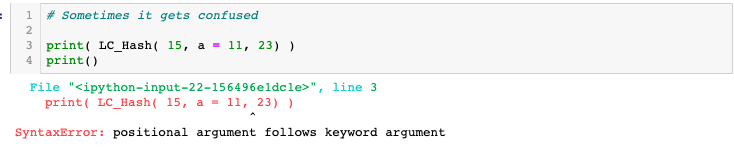

## List processing

In [157]:
A = [1,2,3,4]
B = ["hi", "there", "Paul"]

In [158]:
A

[1, 2, 3, 4]

In [159]:
print(B)

['hi', 'there', 'Paul']


In [160]:
# Pulling stuff out of lists

print(B[2])

# Using negative indices (going right to left)

print(B[-1])     # last element of the list

Paul
Paul


In [161]:
B[1:]

['there', 'Paul']

In [162]:
B[:2]

['hi', 'there']

In [163]:
B[1:3]

['there', 'Paul']

## Adding, replacing, and finding elements and combining lists

In [164]:
# Find location of an element
B.index("there")

1

In [165]:
# Replacing an element
B[2] = "Hagstrom"
print(B)

['hi', 'there', 'Hagstrom']


In [166]:
# Appending two lists using +

C = B + ['and', 'Wayne']
print(C)

['hi', 'there', 'Hagstrom', 'and', 'Wayne']


In [167]:
# Adding a new element to end of list
C = C + ['Snyder']                            #   could also write:    C += ['Snyder']
print(C)

# Adding a new elements in the beginning of a list

C = ['Well'] + C
print(C)

# Adding a new element in the middle of the list
C = C[:3] + ['Paul'] + C[3:]                       # 3 is the location of the new element
print(C)

['hi', 'there', 'Hagstrom', 'and', 'Wayne', 'Snyder']
['Well', 'hi', 'there', 'Hagstrom', 'and', 'Wayne', 'Snyder']
['Well', 'hi', 'there', 'Paul', 'Hagstrom', 'and', 'Wayne', 'Snyder']


### WARNING

When you are changing a list, remember about the global memory.  **Run 
the previous cell 4 or 5 times, and watch what happens!** (It should
keep adding the elements over and over.)

Again, you need to restart the kernel if you have some problem like this. 


### WARNING:   There are list processing functions for permanently changing lists, for example by deleting element and moving everything over, or appending to the end of a list.   These are notoriously hard to understand, and I STRONGLY advise you to not make changes to lists in place, but make new versions of the list. All the functions above will not disturb the original list. 

## The Four Most Important List-Processing Functions

### Find the Length of a list

In [168]:
len(C)

8

### Find the location of an element in a list

In [169]:
print(   B.index('there')    )      # This shows another way of calling a function in Python, using object-oriented syntax.

# Note: This will cause an error if the item is not in the list

1


### Sort a list

There are two ways to sort a list, depending on whether you want to sort the original list *in place* (changing the order in your original list) or produce a *sorted copy* of a list (leaving the original list unchanged):

In [170]:
X = [1,7,5,2]

# Producing a sorted copy of a list
Y = sorted(X)
print(X)
print(Y)
print()

# make a copy sorted in descending order
Z = sorted(X,reverse=True)
print(Z)
print()

# Sorting a list in place
X.sort()
print(X)

# Sort into reverse order in place
X.sort(reverse=True)
print(X)


[1, 7, 5, 2]
[1, 2, 5, 7]

[7, 5, 2, 1]

[1, 2, 5, 7]
[7, 5, 2, 1]


### Copying a List

In [171]:
X = [1,7,5,2]
Y = X.copy()
Y

[1, 7, 5, 2]

## Passing lists as parameters to functions

Remember that parameter passing in python is by reference. Thus if you pass an array into
a subroutine, and modify the array in the subroutine, the modifications will still be in effect after the subroutine exits
(i.e., modifying an array creates side-effects).


In [172]:
def changeList(L):
    L[0] = 5
    
Lst = [1,2,3,4]

print(Lst)
changeList(Lst)
print(Lst)

[1, 2, 3, 4]
[5, 2, 3, 4]


## Shallow vs Deep Copies of Lists

This discussion is based on the one found <a href="https://www.afternerd.com/blog/python-copy-list/">here</a>.

The question is:

> How do you make a copy of a list?

The answer depends on what you mean by a *copy*!  If you mean another reference to the same list, that is called a **shallow copy** (like the fact that my oldest son is called "John" or "JH" -- two names for the same person),
just assign the list to another name:

In [173]:
A = [1,2,3,4]
B = A
print(A)
print(B)

[1, 2, 3, 4]
[1, 2, 3, 4]


But to see that there is only one list (which now has two names), just make changes to each:

In [174]:
A = [1,2,3,4]
B = A

A[0] = 'a'

print(A)
print(B)
print()

B[3] = 'c'

print(A)
print(B)

['a', 2, 3, 4]
['a', 2, 3, 4]

['a', 2, 3, 'c']
['a', 2, 3, 'c']


A shallow copy only copies the *reference* to the list, not the list contents:
 
         A = [1,2,3,4]        
                             A -> [1,2,3,4]
                             
         B = A 
                             A -> [1,2,3,4]  <- B
                             
         A[0] = 'a'
                             A -> ['a',2,3,4]  <- B 
                             
         B[3] = 'c'
                             A -> ['a',2,3,'c']  <- B 
                             

To make a **deep copy** of a list, making an entirely new list with new elements, you can use
a slice, a list constructor, or Python3's `copy` function:

In [175]:
A = [1,2,3,4]

# Copying a list by slicing
B = A[:]

# Copying a list using the list constructor
C = list(A)

# Copying a list using Python3's copy function:
D = A.copy()

# These are all different lists:

A[0] = 'a'
B[1] = 'b'
C[2] = 'c'
D[3] = 'd'

print(A)
print(B)
print(C)
print(D)


['a', 2, 3, 4]
[1, 'b', 3, 4]
[1, 2, 'c', 4]
[1, 2, 3, 'd']


A deep copy makes an entirely new list:
 
         A = [1,2,3,4]        
                             A -> [1,2,3,4]
                             
         B = A[:] 
                             A -> [1,2,3,4] 
                             B -> [1,2,3,4] 
                             
         C = list(A)
                             A -> [1,2,3,4] 
                             B -> [1,2,3,4] 
                             C -> [1,2,3,4]
                             
         D = list(A)
                             A -> [1,2,3,4] 
                             B -> [1,2,3,4] 
                             C -> [1,2,3,4] 
                             D -> [1,2,3,4]
                             
         A[0] = 'a'
                             A -> ['a',2,3,4] 
                             B -> [1,2,3,4] 
                             C -> [1,2,3,4] 
                             D -> [1,2,3,4]

         B[1] = 'b'
                             A -> ['a',2,3,4] 
                             B -> [1,'b',3,4] 
                             C -> [1,2,3,4] 
                             D -> [1,2,3,4]
                             
               --and so on--

## List Comprehensions

A list comprehension is a great way to create lists with a minimum of fuss and bugs. 
The basic idea is that instead of creating a list by specifying every step, say like this:

In [176]:
# Create a list of the first 10 squares

L = [0] * 10         # create a list of 10 zeros

for k in range(len(L)):
    L[k] = (k+1)**2
L

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

you can do it all in one line:

In [177]:
L1 = [  (k+1)**2  for k in range(len(L))  ]
print(L1)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


The idea is to collect together all instances of the expression at the beginning, for all values of k produces
by the for. Some examples may clarify. 

In [178]:
from random import random            # The function random() returns a random double in the range [0..1)

L2 = [  random()  for k in range(10)  ]
print(L2)

[0.4044216757044765, 0.0015464960773501346, 0.2995554765920614, 0.6614565365796136, 0.7507767879926917, 0.43036645074052493, 0.4162504140646396, 0.7651207176585524, 0.24706617964254396, 0.024107540359731394]


You can also use multiple for loops:

In [179]:
D = ['0','1','2','3','4']
L = ['A','B','C','D','E']
     
X = [ d + el for d in D for el in L ]
print(X)

['0A', '0B', '0C', '0D', '0E', '1A', '1B', '1C', '1D', '1E', '2A', '2B', '2C', '2D', '2E', '3A', '3B', '3C', '3D', '3E', '4A', '4B', '4C', '4D', '4E']


List comprehensions can do a lot, especiallly if you use conditions in the "loop" part:

In [180]:
L3 = [63,241,7,43,99,132,6,-3,71,235,24,66]  

# let's pick 63 as the "pivot" for quicksort and partition the list into those
# numbers less than 63 and those greater or equal:

left = [ x for x in L3 if x < 63 ]
right = [ x for x in L3 if x >= 63 ]

print(L3)
print(left)
print(right)

[63, 241, 7, 43, 99, 132, 6, -3, 71, 235, 24, 66]
[7, 43, 6, -3, 24]
[63, 241, 99, 132, 71, 235, 66]


In [181]:
#  List comprehensions can be used to write very complicated algorithms with very few lines of code!

def quicksort(L):
    if(L == []):
        return []
    else:
        pivot = L[0]
        left  = [ x for x in L[1:] if x < pivot ]       # partition list around pivot
        right = [ x for x in L[1:] if x >= pivot ] 
        return (  quicksort(left) + [pivot] + quicksort(right) )

quicksort(L3)

[-3, 6, 7, 24, 43, 63, 66, 71, 99, 132, 235, 241]

## Sets

A set in mathematics is a collection of elements in which there are no duplicates and order does not matter.
In Python, we can create sets, which are implemented by hash tables, and are much more efficient than lists, if
a set is really what you want. 


In [182]:
# create a set
S= {2,3,4,5}
print(S)

# duplicates are ignored
T = { 3, 4,3 }
print(T)
print()

# membership test
print( (3 in S) )

# subset test
print(  (T.issubset(S)) )
print()

# add an element to a set
S.add(7)
print(S)

# remove an element from a set
S.remove(3)
print(S)
print()

# create a new set using set operations union, intersection, and set difference

A = {'a', 'c', 'd'}
B = {'c', 'd', 2 }
C = {1, 2, 3}

print('A =',A)
print('B =',B)
print('C =',C)
print()

print('A U B =', A.union(B))
print('B U C =', B.union(C))
print('A U B U C =', A.union(B, C))
print('A.union() =', A.union())              # just make a copy
print()

# return a new set which is the intersecction of others
print('A n B =',B.intersection(A))
print('B n C =',B.intersection(C))
print('A n C =',A.intersection(C),'     <- this is how empty set can be represented')
print('C n A n B =',C.intersection(A, B))
print()

# return a new set which is the set difference with another
print('A - B =',A.difference(B))
print('B - A =',B.difference(A))
print('A - C =',A.difference(C))


{2, 3, 4, 5}
{3, 4}

True
True

{2, 3, 4, 5, 7}
{2, 4, 5, 7}

A = {'d', 'a', 'c'}
B = {2, 'd', 'c'}
C = {1, 2, 3}

A U B = {2, 'd', 'a', 'c'}
B U C = {1, 2, 3, 'd', 'c'}
A U B U C = {1, 2, 3, 'd', 'a', 'c'}
A.union() = {'d', 'a', 'c'}

A n B = {'d', 'c'}
B n C = {2}
A n C = set()      <- this is how empty set can be represented
C n A n B = set()

A - B = {'a'}
B - A = {2}
A - C = {'d', 'a', 'c'}


## Dictionaries

A dictionary is a data structures which stores (key,value) pairs (typically implemented as a hash table).
This is a great data structure for storing information about objects without having to muck around with lists.


In [183]:
D = { 'a' : 2, 'c' : 8, 'b' : 1}      # Dictionary storing, say, how many times a letter appears in a string
print(D)
E = {}        # empty dictionary
print(E)

{'a': 2, 'c': 8, 'b': 1}
{}


### Basic Dictionary Operations

Most of the manipulation of dictionaries looks like array or list manipulation
but using the keys instead of the position of the elements in the list. 


In [184]:
# Find the value associated with a particular key
D['c']

8

In [185]:
# Insert a key-value pair 
D['a'] = 4
D['z'] = 23
D

{'a': 4, 'c': 8, 'b': 1, 'z': 23}

In [186]:
# update a value associated with a key by doing both
D['z'] = D['z'] + 2
D

{'a': 4, 'c': 8, 'b': 1, 'z': 25}

In [187]:
### Miscellaneous functions

# get all keys
print( D.keys() )
print( list(D.keys()) )       # to just get a list

# get all values
print( list(D.values()) )

dict_keys(['a', 'c', 'b', 'z'])
['a', 'c', 'b', 'z']
[4, 8, 1, 25]


In [188]:
# Default values for dictionaries

# simplest: use the function get(...)
x = D.get('q',0)         # first argument to get is the key, the second is the default
                         # value if the key is not in the dictionary
print(x)

0


In [189]:
# The second way is to use a different kind of dictionary, which you have to import,
# and then define a function to return the default value

from collections import defaultdict

def get_default():
    return 0

A = defaultdict(get_default)

A['a'] = 5
print( A['a'] )
print( A['b'] )

5
0


In [190]:
### Calculating frequency counts using a dictionary

#from collections import Counter        <- this was imported in the first code cell

F = Counter([3,4,2,3,4,5,4,3,2,3,4,5,4,3,8])

print("Counter creates a dictionary giving the frequency counts of each element in the list.")
print(F)

n = 3
print("The list has",F[n], 'instances of the number '+ str(n) + '.')

Counter creates a dictionary giving the frequency counts of each element in the list.
Counter({3: 5, 4: 5, 2: 2, 5: 2, 8: 1})
The list has 5 instances of the number 3.


### Floating-Point Arithmetic

This section will summarize a few important points from the lecture notes in CS 132:

       https://www.cs.bu.edu/fac/snyder/cs132-book/L02Numerics.html

Python has both integer and floating point types. Integers, as long as they are not too large, can be stored precisely; however, real numbers (such as $\pi$), can only be approximated by storing the number in scientific notation in binary:

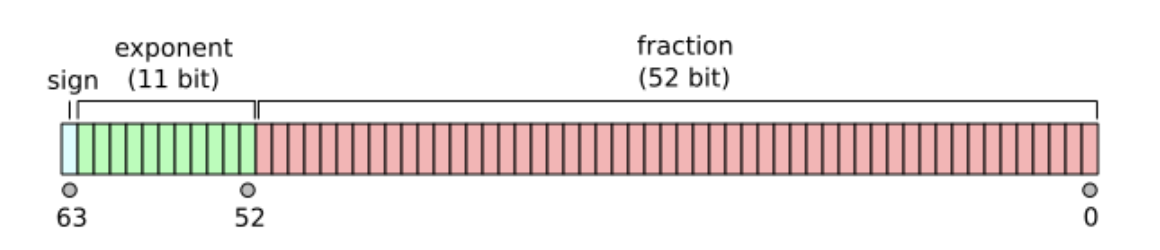

Because only a fixed number of bits are used, most real numbers cannot be represented exactly in a computer.

Another way of saying this is that, usually, a floating point number is an approximation of some particular real number.

Generally when we try to store a real number in a computer, what we wind up storing is the closest floating point number that the computer can represent.

Problems arise when we work with floating point numbers and confuse them with real numbers, thereby forgetting that most of the time we are not storing the real number exactly, but only a floating point number that is close to it.

Let’s look at some examples. First:

In [191]:
# ((1/8)*8)-1
a = 1/8
b = 8
c = 1
(a*b)-c

0.0

It turns out that 1/8, 8, and 1 can all be stored exactly in IEEE-754 floating point format.

So, we are storing the inputs exactly (1/8, 8 and 1), computing the results exactly, yielding 

  $$(1/8)∗8=1$$

and representing the result exactly (zero).

OK, here is another example:

In [192]:
# ((1/7)*7)-1
a = 1/7
b = 7
c = 1
a * b - c

0.0

Here the situation is different.

1/7 can not be stored exactly in floating point format.

In binary, 1/7 is 0.001001⎯⎯⎯⎯⎯⎯⎯⎯⎯, an infinitely repeating pattern that clearly cannot be represented in a finite sequence of bits.

Nonetheless, the computation (1/7)∗7 still yields exactly 1.0.

Why? Because the rounding of 0.001001⎯⎯⎯⎯⎯⎯⎯⎯⎯ to its closest floating point representation, when multiplied by 7, yields a value whose closest floating point representation is 1.0.

Now, let’s do something that seems very similar:

In [193]:
# ((1/70)*7)-0.1
a = 1/70
b = 7
c = 0.1
a * b - c

-1.3877787807814457e-17

In this case, neither 1/70 nopr 0.1 can be stored exactly.

More importantly, the process of rounding 1/70 to its closest floating point representation, then multiplying by 7, yields a number whose closest floating point representation is not 0.1

However, that floating point representation is very close to 0.1.

Let’s look at the difference: -1.3877787807814457e-17.

This is about $−1\cdot 10^{−17}$ =  -0.0000000000000001.

Compared to 0.1, this is a very small number. The relative error abs(-0.0000000000000001 / 0.1) is about $10^{−16}$.

This suggests that when a floating point calculation is not exact, the error (in a relative sense) is usually very small.

### Punchline 1:  Do not compare floating point numbers for equality¶

Two floating point computations that should yield the same result mathematically, may not do so due to rounding error.

However, in general, if two numbers should be equal, the relative error of the difference in the floating point should be small.

So, instead of asking whether two floating numbers are equal, we should ask whether the relative error of their difference is small.

In [194]:
a = 7
b = 1/10
c = 1/a
r1 = a * b * c
r2 = b * c * a
np.abs(r1-r2)/r1

1.3877787807814457e-16

In [195]:
np.finfo('float')

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [196]:
print(r1 == r2)

False


Instead, when comparing floating-point values, we should test whether they
are "close enough." 
This test is needed often enough that numpy has a function that implements it:

In [197]:
np.isclose(r1, r2)

True

### Punchline 2:  Beware of ill-conditioned problems¶

An ill-conditioned problem is one in which the outputs depend in a very sensitive manner on the inputs.

That is, a small change in the inputs can yield a very large change in the outputs.

The simplest example is computing 1/(𝑎−𝑏).

In [198]:
print(f'r1 is {r1}')
print(f'r2 is very close to r1')
r3 = r1 + 0.0001
print(f'r3 is 0.1001')
print(f'1/(r1 - r2) = {1/(r1 - r2)}')
print(f'1/(r3 - r2) = {1/(r3 - r2)}')

r1 is 0.1
r2 is very close to r1
r3 is 0.1001
1/(r1 - r2) = 7.205759403792794e+16
1/(r3 - r2) = 9999.999999998327


If a is close to b, small changes in either make a big difference in the output.

Because the inputs to your problem may not be exact, if the problem is ill-conditioned, the outputs may be wrong by a large amount.

Later on in CS 132 we will see that the notion of ill-conditioning applies to matrix problems too, and in particular comes up when we solve certain problems involving matrices.

### Punchline 3: Relative error can be magnified during subtractions¶

Two numbers, each with small relative error, can yield a value with large relative error if subtracted.

Let’s say we represent a = 1.2345 as 1.2345002 – the relative error is 0.0000002.

Let’s say we represent b = 1.234 as 1.2340001 – the relative error is 0.0000001.

Now, subtract a - b: the result is .0005001.

What is the relative error? 0.005001 - 0.005 / 0.005 = 0.0002

The relative error of the result is 1000 times larger than the relative error of the inputs.

Here’s an example in practice:

In [199]:
a = 1.23456789
b = 1.2345678
print(0.00000009)
print(a-b)
print(np.abs(a-b-0.00000009)/ 0.00000009)

9e-08
8.999999989711682e-08
1.1431464011915431e-09


We know the relative error in the inputs is on the order of $10^{−16}$, but the relative error of the output is on the order of $10^{−9}$ – i.e., a million times larger.

A good summary that covers additional issues is at https://docs.python.org/2/tutorial/floatingpoint.html.

## Python in Notebooks

Python (literally iPython) in Jupyter notebooks has become a 
standard in machine learning and data analysis, and so we
will use this framework for submitting work in CS 237. The following
introduces the major concepts that you need for CS 237. For a more
complete introduction, read through the following tutorial
up to Section 4.7.2:

https://docs.python.org/3/tutorial/

This tutorial assumes you have read or at least skimmed the
above resource, and will concentrate on those part of Python
that we need to know about for CS 237. 


## Features/Bugs of Python to Watch out for

There are three things about Python that you need to know, if you
are more familiar with a language like Java or C. 

(1) Python is an **interpreted** language, which means it are processed
in a "Read-Eval-Print" loop: 
input expressions or definitions or assignment statements are read, evaluated,
and the result printed out, and then it starts all over again with the next expression. 
You can see the order in which the cells were evaluated by looking at the number in square braces to the left: 

    In [87]:

(2)  Python is a **weakly-typed** language, which means that values have types (of course) but 
variables don't have to be declared with a type and only contain values of that type.
Any variable can represent any type of value. 


(3) Python maintains a **global memory** of all definitions (function 
definitions, and assignment statements), which is maintained until
you terminate or restart the kernel.    This feature causes a lot of problems!

Features (2) and (3) make it difficult to keep track of the variables
in your program, and are the major source of bugs when you are
first learning Python.  Unfortunately, Jupyter notebooks do not
help, and in fact make these features more difficult to handle. 
We will develop strategies to minimize
these problems. 


## Managing variables in a weakly-typed language (feature 2)


Python does not force all variables to be declared with a type, as in Java and C,
and this leads to problems. The main problem is that you create a variable
accidentally with the same name, but different meaning. Here
is a variable X being used in three different ways. Confusing? YES. 

In [200]:
X = 4
print(X)

X = 'hi'
print(X)

X = [X, 'folks']              # The second X refers to the previous definition 
print(X)

4
hi
['hi', 'folks']


You might think this is not a big deal, but if you make a habit of using only a small number of variable names
such as X, Y, x, k, i, etc. and if these occur over the WHOLE range of your notebook, you will almost certainly have some confusion somewhere about what a variable means. 

Even worse, Python allows you to redefine the standard names of functions, so the following, if you uncomment the last two lines, 
creates a confusing bug:

### TODO:  

In the next cell, remove the hash mark from the last two lines, to "uncomment" them. Run the cell, and observe that it
seems fine. 

Now run it once more: it will generate a weird error, because the call to the constructor <code>list</code>
is now calling a list [2,5,4]. You've destroyed the binding between the variable list and its definition
in the standard library. 

Finally, put the hash marks back in, and hit `Restart & Run All` from the `Kernel` menu. 

<b>NOTE:  IF YOU GET A WEIRD BUG THAT MAKES NO SENSE, DO `Kernel -> Restart & Run All` BEFORE DOING ANYTHING ELSE. IT OFTEN FIXES THE PROBLEM.</b> 

In [201]:
A = np.array([2,3,4])
print(A)
B = list(A)                 # the function list is a constructor for lists
print(B)

#list = [2,5,4]              #  You are REDEFINING the variable list
#print(list)

[2 3 4]
[2, 3, 4]


### Punchline:  Use as few global variables as possible. Do NOT reuse common names (X, i, lst) as global variables. Do NOT use the  `sum`, `list`, `sqrt` as variable names, as these are <b> function names</b> predefined in Python. 

Either write a function for each problem, storing everything as local variables, or give each global variable a unique name by adding the number of the problem. 

Example:  Suppose you have the following code which is your solution to a Problem Four in a homework:

In [202]:
A = [2,3,4]
B = A + [6]                 
print(B)

X = [2,5,4]
print(X)


[2, 3, 4, 6]
[2, 5, 4]


In [203]:
# Here is a way of avoiding global variables by wrapping everything in a function (all variables local)

def solution4():
    A = [2,3,4]
    B = A + [6]                 
    print(B)

    X = [2,5,4]
    print(X) 
    
solution4()             # be sure to call it! 


[2, 3, 4, 6]
[2, 5, 4]


In [204]:
# Or simply add the problem number to the name:

A4 = [2,3,4]
B4 = A4 + [6]                 
print(B4)

X4 = [2,5,4]
print(X4)

[2, 3, 4, 6]
[2, 5, 4]


<b>Caveat:</b> You do NOT need to do this for all variables, since local variables in for loops or functions
are not a problem. Use the usual variables x,y,i, X, etc. for local variables; there is
no problem with these. 

## Managing the global list of variable bindings (feature 3)

Python is an interpreted language (feature 1) which uses a "Read-Eval-Print" loop to read
an expression, evaluate it, and print out the value. For definitions, such as
assignments and function definitions, there is also a change to the global master list
which holds all variable and function definitions. 

If you use unique global variable names, you should not have too much trouble with this,
but still there are strange things that happen if you don't know about this feature. 
The problem is about "old values" which were stored in the past, even if you don't need them. 

Let us look at one example to show the problem, and you can keep a watch out for this.

Suppose you write the following and run it:

In [205]:
X = [1,2,3]

In [206]:
X

[1, 2, 3]

Now there is a binding in the global memory:  <code>   X = [1,2,3]   </code>

But then suppose you change your mind and delete this statement. The problem is
that the binding is NOT removed unless you **Restart** the Kernel (in the Kernel menu). 

Thus, four hours later, you have completely forgotten about this X, and you write this
code, but you make a very small error, and leave out the '1' in 'X1'.  It's hard
to see that the single character is missing, and when you run it, PYTHON 
STILL HAS THE BINDING FOR X AND YOU WON'T KNOW ABOUT THE ERROR EXCEPT FOR THE RESULT
BEING WRONG.  You'll have to see the missing '1'. 

In [207]:
X1 = ['a','b','c','d','e','f','g']

print( X[:2] )        # expecting to see ['a','b']  but Python finds the old value of X and doesn't complain

[1, 2]


### PUNCHLINE:   If you have a nasty bug that you can't figure out, try Restart and Run All from the Kernel menu.  ALWAYS Restart and Run All before submitting to make sure everything works as it is supposed to. 

## Plotting Points

The <code>scatter(...)</code> function is used to plot points from a list of x values and the associated y values. 


This is the list of points: [(1, 2), (2, 3), (3, 6), (4, 8)]
They must be input to the function as separate lists:
	X = [1, 2, 3, 4]
	Y = [2, 3, 6, 8] 



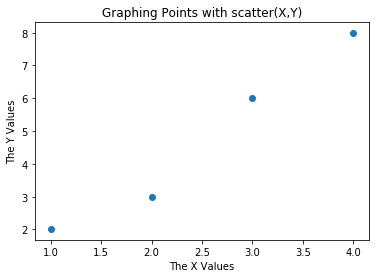

In [208]:
# To plot the points (1,2), (2,3), (3,6), (4,8) we would list the x values and the corresponding y values:
X = [1,2,3,4]
Y = [2,3,6,8]

print("\nThis is the list of points:",list(zip(X,Y)))
print("They must be input to the function as separate lists:")
print("\tX =",X)
print("\tY =",Y,"\n")
plt.scatter(X,Y)
plt.title('Graphing Points with scatter(X,Y)')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()



# Plotting Lines and Curves

If you call <code>plot(...)</code> instead of <code>scatter(...)</code> you will display a curve created by connecting the points with straight lines. Essentially you can only plot straight lines between points, but if the points are close together, you will not notice, and it will look like a smooth curve. 

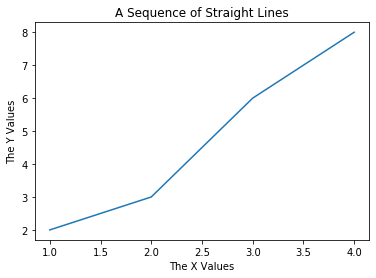

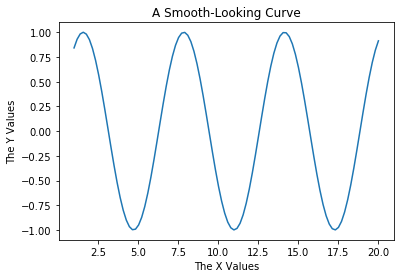

In [209]:
# To plot a curve through the points (1,2), (2,3), (3,6), (4,8) we would use: 
plt.plot([1,2,3,4], [2,3,6,8])
plt.title('A Sequence of Straight Lines')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

X = np.linspace(1,20,100)            # returns a list of 100 equally-spaced values in the range [1..20]
Y = [np.sin(x) for x in X]
plt.plot(X,Y)
plt.title('A Smooth-Looking Curve')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

If you leave out the $X$ values, `plot(...)` will assume that you want the x-axis labeled 0, 1, ..., (len(X)-1),
corresponding to the labels on an array or list:

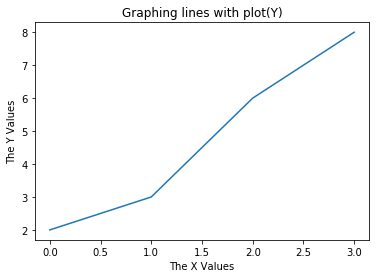

In [210]:
# Plot a list against the indices
Y = [2,3,6,8]

plt.plot(Y)
plt.title('Graphing lines with plot(Y)')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

If you want to do both, you can simply call both functions before you call show(). 

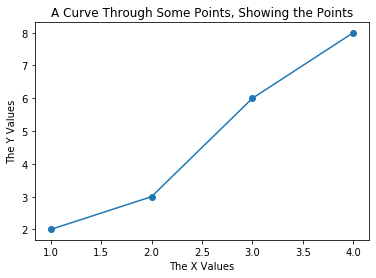

In [211]:
plt.scatter([1,2,3,4], [2,3,6,8])
plt.plot([1,2,3,4], [2,3,6,8])
plt.title('A Curve Through Some Points, Showing the Points')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

If you want to draw a single line from $(x_1,y_1)$ to $(x_2,y_2)$ you can plot $[x_1,x_2]$ and $[y_1,y_2].$

Here we have added a zero line to our sin curve:

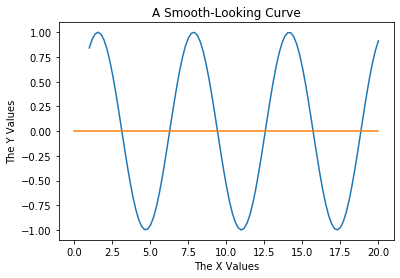

In [212]:
X = np.linspace(1,20,100)            # returns a list of 100 equally-spaced values in the range [1..20]
Y = [np.sin(x) for x in X]
plt.plot(X,Y)
plt.plot([0,20],[0,0])
plt.title('A Smooth-Looking Curve')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

### For further details on drawing plots, particularly on color and format, see the Appendix at the end of this document

# Bar Charts

If we do the exact same thing as we did with a simple plot, but use the function <code>bar(...)</code> we get a bar chart:

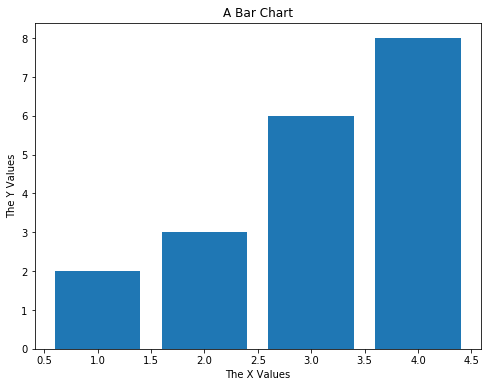

In [213]:
# To plot the points (1,2), (2,3), (3,6), (4,8) we would list the x values and the corresponding y values:
plt.figure(num=None, figsize=(8, 6))
plt.bar([1,2,3,4], [2,3,6,8])
plt.title('A Bar Chart')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

If the Y axis is probabilities (in the range 0 .. 1), we get a distribution of the probabilities among the outcomes of an experiment:

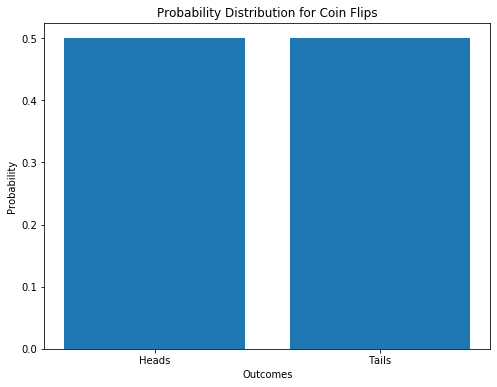

In [214]:
# Show the distribution of probabilities for a coin flip:
x = [0,1]
y = [0.5, 0.5]
labels = ['Heads', 'Tails']

plt.figure(num=None, figsize=(8, 6))
plt.xticks(x, labels)
plt.bar(x,y)
plt.title('Probability Distribution for Coin Flips')
plt.ylabel("Probability")
plt.xlabel("Outcomes")
plt.show()

With a few tweaks, you can create an attractive bar chart for arbitrary probability distributions:

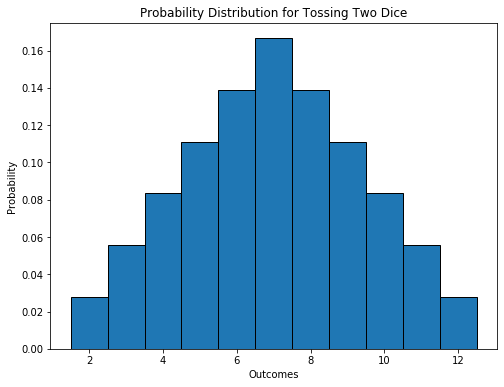

In [215]:
# Show the distribution of probabilities for flipping two dice
x = [k for k in range(2,13)]
y = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]

plt.figure(num=None, figsize=(8, 6))
plt.bar(x,y, width=1.0,edgecolor='black')
plt.title('Probability Distribution for Tossing Two Dice')
plt.ylabel("Probability")
plt.xlabel("Outcomes")
plt.show()

# Histograms
- If you give a list of values to <code>hist(...)</code> it will create a histogram counting how many of each value occur; this list can be unordered;
- You will get a cleaner display if you specify where the edges of the bins are, and make sure the edges of the bins are visible, as shown in this example:

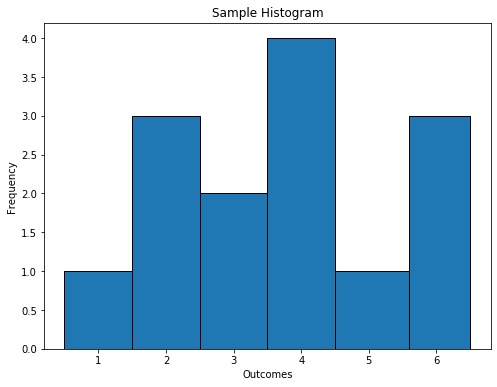

In [216]:
plt.figure(num=None, figsize=(8, 6))
plt.hist([1,2,4,2,6,2,4,5,6,4,6,3,4,3],bins=[0.5,1.5,2.5,3.5,4.5,5.6,6.5],edgecolor='black')
plt.title('Sample Histogram')
plt.xlabel("Outcomes")
plt.ylabel("Frequency")
plt.show()

# Customizing Your Plots

One thing you have probably noticed is that when you write "bare-bones" code such as we have above, certain
defaults are used for the size and layout of the figure and the style of the drawing. One of the most noticable is that when you draw multiple lines, Matplotlib will change the color each time you call the same function (notice that this doesn't happen when calling a different function, e.g., plot followed by scatter). 

## Using Colors

Matplotlib cycles through a sequence of 10 colors, which is fine if that is what you want. For my taste, they are pretty ugly, and in the next section we will show you how to use the colors you want. 



The 10 Matplotlib color sequence, starting at 12 o'clock and going clockwise:


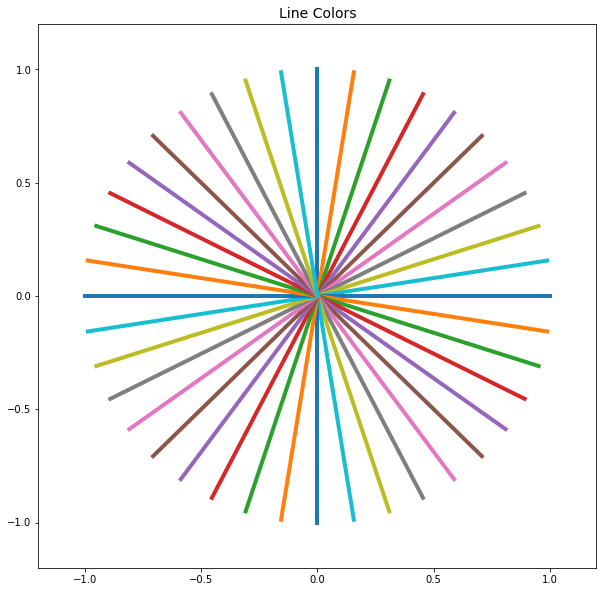

In [217]:
print("\nThe 10 Matplotlib color sequence, starting at 12 o\'clock and going clockwise:")

plt.figure(figsize=(10,10))
for k in np.arange(0,2*np.pi,np.pi/20):                 # arange is like range, except it allows you to use floats
    plt.plot([0,np.sin(k)],[0,np.cos(k)],lw=4)
plt.title('Line Colors',fontsize=14)
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.show()

Here is an example where we simply change the colors of the plot using the appropriate parameter; see a complete list of colors here: https://matplotlib.org/2.0.2/api/colors_api.html

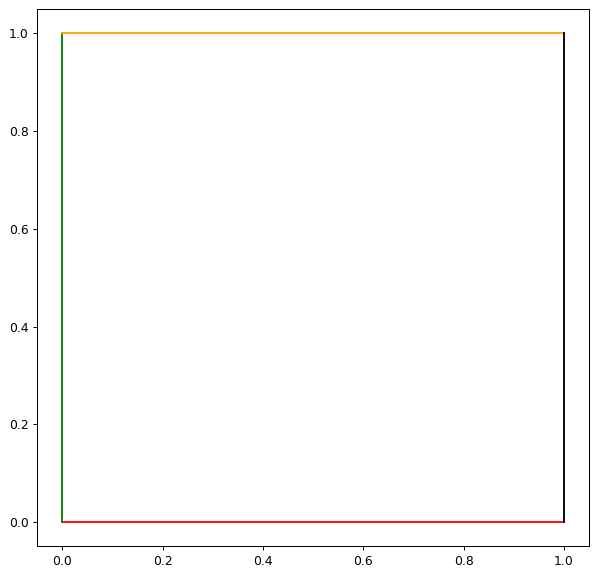

In [218]:
# EXAMPLE: Plotting a square with lines of different colors
plt.figure(num=None, figsize=(8, 8), dpi=89)
plt.plot([0,1],[0,0],color='red') # Line connecting (0,0) to (1,0)
plt.plot([0,0],[0,1],color='green') # Line connecting (0,0) to (0,1)
plt.plot([0,1],[1,1],color='orange') # Line connecting (0,1) to (1,1)
plt.plot([1,1],[0,1],color='black') # Line connecting (1,0) to (1,1)

## Changing the Style of Plots

Here is an example showing how to

  - change the size of the whole figure
  - change the color of lines or points
  - change the style of lines or points
  
To see a complete list of lines styles see:  https://matplotlib.org/2.0.2/api/lines_api.html

To see a complete list of colors see: https://matplotlib.org/2.0.2/api/colors_api.html

To see a complete list of marker (point) styles see:  https://matplotlib.org/2.0.2/api/markers_api.html#module-matplotlib.markers

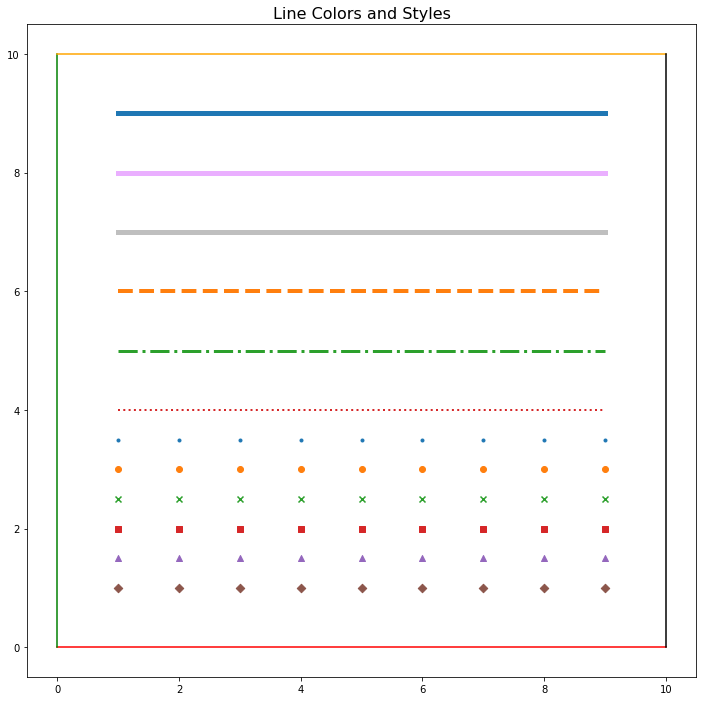

In [219]:
# EXAMPLE: Plotting a square via lines 
plt.figure(figsize=(12, 12))             # the size is (horizontal, vertical)
plt.title("Line Colors and Styles",fontsize=16)
plt.plot([0,10],[0,0],  color='red') # Line connecting (0,0) to (1,0)
plt.plot([0,0],[0,10],  color='green') # Line connecting (0,0) to (0,1)
plt.plot([0,10],[10,10],color='orange') # Line connecting (0,1) to (1,1)
plt.plot([10,10],[0,10],color='black') # Line connecting (1,0) to (1,1)
plt.plot([1,9],[9,9], linewidth=5)    # give a linewidth in points, default is 1.0
plt.plot([1,9],[8,8], linewidth=5,color = '#eaafff')    # for custom color give the RGB value in hex
plt.plot([1,9],[7,7], linewidth=5,color='0.75') # for grey give the percentage of white in quotes
plt.plot([1,9],[6,6], lw=4,linestyle='--') # Linestyles
plt.plot([1,9],[5,5], lw=3,linestyle='-.') # Linestyles
plt.plot([1,9],[4,4], lw=2,linestyle=':') # Linestyles

plt.scatter(range(1,10),[3.5]*9,marker='.')  # various markers, if you don't specify the colors it will cycle
plt.scatter(range(1,10),[3]*9,marker='o')    # through a bunch of colors, starting with blue, orange, green, etc.
plt.scatter(range(1,10),[2.5]*9,marker='x')
plt.scatter(range(1,10),[2]*9,marker='s')
plt.scatter(range(1,10),[1.5]*9,marker='^')
plt.scatter(range(1,10),[1]*9,marker='D')
print()

## Et Cetera

Then you can start getting obsessive, adding gridlines, changing the background color,  adding legends, text, and so on. 

Another nice feature of matplotlib is that you can insert simple Latex commands into titles and text.....

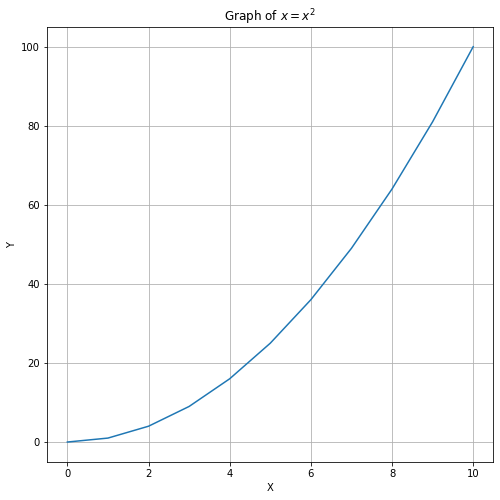

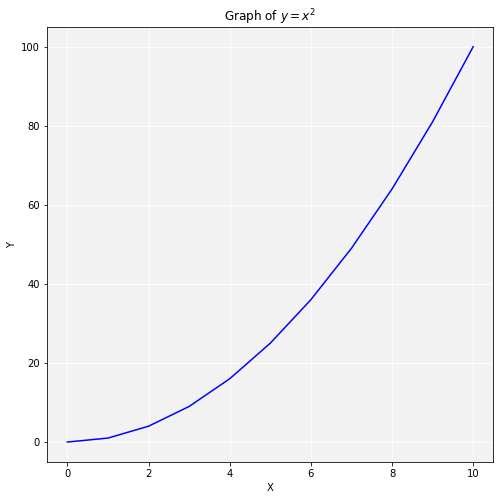

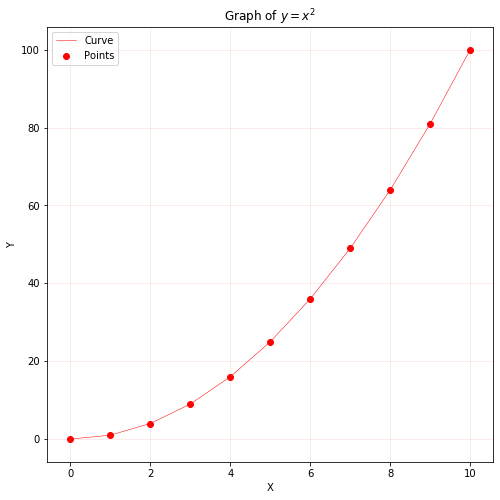

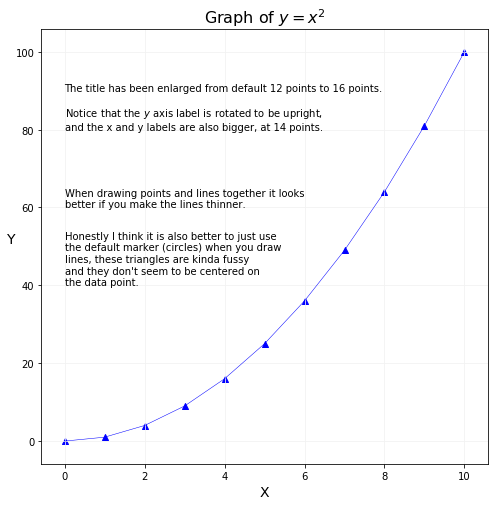

In [220]:
x = [i for i in range(11)]
y = [i**2 for i in x]


plt.figure(figsize=(8, 8))
plt.title('Graph of $x = x^2$')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.plot(x,y)
plt.show()


plt.figure(figsize=(8, 8))
plt.title('Graph of $y = x^2$')
plt.grid(color='w')                # grid of white lines -- don't use points with this, they look funny
plt.gca().set_facecolor('0.95')    # background of light grey
plt.plot(x,y,color='b')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


plt.figure(figsize=(8, 8))
plt.title('Graph of $y = x^2$')
plt.grid(color='r',alpha=0.1)       # alpha sets the transparency, 0 = invisible and 1 = normal           
plt.plot(x,y,color='r',lw=0.5,label='Curve')
plt.scatter(x,y,color='r',marker='o',label='Points')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


plt.figure(figsize=(8, 8))
plt.title('Graph of $y = x^2$',fontsize=16)
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",rotation=0,fontsize=14)
plt.grid(color='0.95')
plt.text(0,90,"The title has been enlarged from default 12 points to 16 points.")
plt.text(0,80,"Notice that the $y$ axis label is rotated to be upright, \nand the x and y labels are also bigger, at 14 points.")   # lower left corner of text string is at point (0,60)
plt.text(0,60,"When drawing points and lines together it looks \nbetter if you make the lines thinner.")
plt.text(0,40,"Honestly I think it is also better to just use\nthe default marker (circles) when you draw \nlines, these triangles are kinda fussy\nand they don't seem to be centered on \nthe data point.")
plt.plot(x,y,color='b',lw=0.5)
plt.scatter(x,y,color='b',marker='^')
plt.show()


